## **ABCDEats Company- Customer Segmentation**

# **The Project:** - Adicionar aqui como podemos ver os 4 tipos, com que variáveis e ideias, and add this to the report and here
**Through Academic knowledge and research,  we know that there 4 types of customer segmentation:**


* Demographic Segmentation- who are our customers, their age, I guess that's all we get,but again, there are cases where people buy stuff for people that depend on them. SO, again, gotta think this through 

* Geographic Segmentation- promotions in areas?, regions that buy the most, what is different about that region, what do they pay with more in that region, regions that buy the less and why

* Psychographic Segmentation- interests, they are most probably interested in food so, so sctrach that? but could still get insights somehow, just gotta think harder

* Behavioral Segmentation - Spending habits, hour which they spend, when, how often, do they spend more when they have promotions, who spends less and why, do they spend less when there is no promotion

`Sources`:
* Forbes Advisor: https://www.forbes.com/advisor/business/customer-segmentation/ 
* VWO : https://vwo.com/blog/visitor-segmentation/ 

**OBS, esta secção é para falarmos sobre o projecto, e depois temos que apagar estas ideias**


## **Group Members:**

* **Guilherme Goudinho**-
* **Maria Inês Assunção**-
* **Osmáiny Raimundo**- 
* **Vinincius Lallo**-

## **METADATA**
 * **customer_id** :  Unique identifier for each customer.

 * **customer_region**:  Geographic region where the customer is located.

 * **customer_age**:  Age of the customer.

 * **vendor_count**:  Number of unique vendors the customer has ordered from.

 * **product_count**:  Total number of products the customer has ordered.

 * **is_chain**:  Indicates whether the customer’s order was from a chain restaurant. From the vender_count, which ones are from a chain restaurant

 * **first_order** :  Number of days from the start of the dataset when the customer first placed an order.


 * **last_order** Number of days from the start of the dataset when the customer most  recently placed an order.


 * **last_promo** :  The category of the promotion or discount most recently used by the
 customer.

 * **payment_method** :  Method most recently used by the customer to pay for their orders.

 * **CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc**. : The amount in monetary units spent by the customer from the indicated type of cuisine.

 * **DOW_0 to DOW_6**:   Number of orders placed on each day of the week
 (0 =Sunday, 6 =Saturday).

 * **HR_0 to HR_23** :  Number of orders placed during each hour of the day
 (0 =midnight, 23 = 11 PM).
 




## **TABLE OF CONTENTS**

1. [Imports](#section-1)
    1. [Import the needed libraries ](#subsection-1.1)
    2. [Import dataset](#subsection-1.2)
2. [Exploratory Data Analayis](#section-2)
    1. [Data Exploration](#subsection-2.1)
    2. [Data Visualization](#subsection-2.2) 
    3. [Data-preprocessing - Feature Architecture & Incoherencies](#subsection-2.3)
    4. [Outliers](#subsection-2.4)
    5. [Missing Values(Part 1)](#subsection-2.5)
    6. [Data Scaling](#subsection-2.6)
    7. [Missing Values (Part 2)](#subsection-2.7)
3. [Feature Selection](#section-3)
    1. [Variance Threshold](#subsection-3.1)
    2. [Spearman's Correlation](#subsection-3.2)

## **1.Imports**

In [1]:
#Importing the necessary libraris for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import ceil
from PIL import Image
from IPython.display import display

from itertools import product

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## If you have an error here saying ydata_profiling is not available
## Run the instructions above
## IF you are still unable to install `ydata-profiling` through this method, 
## Comment out the line below importing ProfileReport
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# to see all the columns
pd.set_option('display.max_columns', None)

# **2. Exploratory Data Analysis**

## **2.1. Data Exploration**

## **2.1.1 Importing the data**

In [2]:
#Importing our dataset into a variable "food-df"
food_df=pd.read_csv("DM2425_ABCDEats_DATASET.csv")  

## **2.1.2 Initial Analysis**

In [3]:
#Checking the first 6 rows of our dataset
food_df.head(6)
#Comments:
#We will have to tuirn the customer id as our index column
#The first order was the day that the purchase was done, from 0 to 90 days, if we have day 0, it is because the purchase was made the day the datset started
#There are purchases that din´t happen? How is it possible?


,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,24.92,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
food_df.tail(5) #Checking if there are any aggregation rows  that may affect our dataset, which in this case, there aren´t any

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,7.91,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [5]:
# checking the number of columns and rows of our dataset
print(f"\033[1;30mOur dataset has \033[1;35m{food_df.shape[0]}\033[1;30m rows and \033[1;35m{food_df.shape[1]}\033[1;30m columns\033[0m")


Our dataset has 31888 rows and 56 columns


In [6]:
#Getting the information about our dataset: column, column length, and datatype, in order to identify possible wrong dataypes
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [7]:
food_df['is_chain'].value_counts() #Getting the value counts to better understand this column. 

1     8547
0     6104
2     5893
3     3698
4     2165
5     1380
6      946
7      679
8      500
9      374
10     291
11     248
12     169
13     152
14     138
15      89
16      68
18      65
17      55
19      35
20      34
21      29
22      26
24      23
23      20
26      20
27      16
25      14
28      13
29      10
31       9
30       9
32       8
33       6
34       6
36       5
43       5
40       5
37       4
35       4
45       4
39       2
42       2
48       2
75       1
63       1
54       1
83       1
49       1
46       1
61       1
44       1
67       1
56       1
81       1
73       1
47       1
38       1
65       1
80       1
Name: is_chain, dtype: int64

Analysing from the top rows, we realized that the `Is_Chain` colum's values show that from the vender_count column, which ones are from a chain restaurant. Hence we will alter the metadata.

In [8]:
food_df['first_order'] 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
31883    NaN
31884    NaN
31885    NaN
31886    NaN
31887    NaN
Name: first_order, Length: 31888, dtype: float64

There a NaN values, which does not make sense because there needs to be an order placed, in order to be in the dataset

In [9]:
food_df['HR_0'].value_counts()

0.0    30723
Name: HR_0, dtype: int64

We realized that no purchase is done at HR_O. We need to explore that better, later on.


## **2.1.3.Checking Duplicate Values**


Checking the duplicated rows of our dataset, and then in the customer id column, because it is going to be our index column

In [10]:
#Checking the duplicate values
duplicates=food_df.duplicated().sum()
print(f"\033[1;30mOur dataset has \033[1;35m{duplicates}\033[1;30m duplicated rows")

Our dataset has 13 duplicated rows


In [11]:
#Dropping the duplicated rows
food_df.drop_duplicates(inplace=True)
new_duplicates=food_df.duplicated().sum()


In [12]:
#Checking again, if we still have duplicated rows
print(f"\033[1;30mOur dataset has now \033[1;35m{new_duplicates}\033[1;30m duplicated rows")

Our dataset has now 0 duplicated rows


In [13]:
#Checking if our customer_id column has duplicates 
customer_duplicate=food_df['customer_id'].duplicated().sum()
print(f"\033[1;30mOur The customer_id column has \033[1;35m{customer_duplicate}\033[1;30m duplicated entries")

Our The customer_id column has 0 duplicated entries


Now that customer_id has no duplicated values, in the coherence check section, we can set it as our index column

## **2.1.4.Checking the Missing Values**

In this section, we will check the columns that have missing values. Missing values reduce the number of data availbale to be analysed, thus, they should be propely analised and dealt with.

In [14]:
#Checking how many missing values we have for each column

# Checking and printing columns with missing values
for column in food_df.columns:
    missing_values = food_df[column].isna().sum()
    if missing_values > 0:
        print(f"\033[1;35m{column} \033[0m has \033[1;35m{missing_values}\033[0m missing values")

customer_age  has 727 missing values
first_order  has 106 missing values
HR_0  has 1164 missing values


Replacing "-" 

While looking at data, We noticed that some missing data in categorical varibales that were labeled as - we should replace them by NaN, but to do our analysis, it would be interesting too see the behaviour of those entries, since these are categorical columns, so we will replace them by "empty"


In [15]:
#Replacing the - by nan
food_df.replace("-", "empty", inplace=True)  

In [16]:
#In case there are other missing values in different forms, we will replace them by NaN
food_df.replace(["","?"," ","null", "NK", "na"], np.nan, inplace = True)
food_df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [17]:

# Checking and printing columns with missing values afetr the replacedment
for column in food_df.columns:
    missing_values = food_df[column].isna().sum()
    if missing_values > 0:
        print(f"\033[1;35m{column} \033[0m has \033[1;35m{missing_values}\033[0m missing values")



customer_age  has 727 missing values
first_order  has 106 missing values
HR_0  has 1164 missing values


Getting the unique values of the columns with missing value

In [18]:
#Getting the unique values of first_order
food_df['first_order'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       nan])

In [19]:
#Getting the unique values of customer_region
food_df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', 'empty', '4140', '2490', '8370',
       '8550'], dtype=object)

In [20]:
#Getting the unique values of customer_age
food_df['customer_age'].unique()

array([18., 17., 38., nan, 20., 40., 24., 27., 33., 26., 21., 51., 35.,
       22., 31., 15., 47., 19., 28., 32., 25., 37., 42., 48., 16., 34.,
       29., 23., 30., 39., 46., 41., 49., 53., 36., 43., 44., 45., 57.,
       58., 68., 56., 61., 60., 54., 59., 50., 55., 52., 65., 75., 66.,
       79., 80., 63., 77., 62., 69., 72., 64., 76., 74., 67., 70., 78.,
       71., 73.])

In [21]:
#Getting the unique values of last_promo
food_df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', 'empty', 'FREEBIE'], dtype=object)

In [22]:
#Getting the unique values of HR_0
food_df['HR_0'].unique()

array([ 0., nan])

Now we have 5 columns with missing values, later on, we will have to discuss how to deal with each of them

## **2.1.5.Coherence Check**

In this section we will check the columns with wrong datatypes and correct them, we will also create new columns that will help us for the statistical analysis.

## Changing the Data Types

In [23]:
#Checking again our datatypes
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31875 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31875 non-null  object 
 1   customer_region           31875 non-null  object 
 2   customer_age              31148 non-null  float64
 3   vendor_count              31875 non-null  int64  
 4   product_count             31875 non-null  int64  
 5   is_chain                  31875 non-null  int64  
 6   first_order               31769 non-null  float64
 7   last_order                31875 non-null  int64  
 8   last_promo                31875 non-null  object 
 9   payment_method            31875 non-null  object 
 10  CUI_American              31875 non-null  float64
 11  CUI_Asian                 31875 non-null  float64
 12  CUI_Beverages             31875 non-null  float64
 13  CUI_Cafe                  31875 non-null  float64
 14  CUI_Ch

From this result, we observed the following columns with possible wrong datatypes:
* `customer_age`
* `first_order`
* `HR_0`

This is based on the the following: Ages are whole numbers; first_order should be an int because it is a day; HR_0 should be int

In [24]:
# Setting the customer_id column as our index column. Because it has unique values that represent each row of row of our dataset.
food_df = food_df.set_index('customer_id')

In [25]:
# customer_age mudar para int
#food_df['customer_age'] = food_df['customer_age'].astype(int)

In [26]:
# first_order mudar para int
#food_df['first_order'] = food_df['first_order'].astype(int)

In [27]:
# Checking again the datatypes after the changes
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31875 non-null  object 
 1   customer_age              31148 non-null  float64
 2   vendor_count              31875 non-null  int64  
 3   product_count             31875 non-null  int64  
 4   is_chain                  31875 non-null  int64  
 5   first_order               31769 non-null  float64
 6   last_order                31875 non-null  int64  
 7   last_promo                31875 non-null  object 
 8   payment_method            31875 non-null  object 
 9   CUI_American              31875 non-null  float64
 10  CUI_Asian                 31875 non-null  float64
 11  CUI_Beverages             31875 non-null  float64
 12  CUI_Cafe                  31875 non-null  float64
 13  CUI_Chicken Dishes        31875 non-null  float64
 1

In [28]:
food_df.head(10) # Visualizing the values in the columns

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,empty,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8475ee66ef,2440,24.0,2,2,2,0.0,2,empty,CARD,5.88,0.00,1.53,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.0,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


We weren´t able to change the datatypes yet, because of the missing values.

## Creating new features 

This section was created here becasue we created new features that will be used for the Data statistics section and visualization section, later on, we will have a Feature Engineering section on the Notebook, where we will better organize the features.

`Hours of the day columns`

In [29]:
#Dividing the HR columns into midday, evening, and late_ngiht.
#This division was done based on the visualization section, where we observed the 3 peaks of orders.
food_df['midday_orders'] = food_df[['HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14']].sum(axis=1)
food_df['evening_orders'] = food_df[['HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21']].sum(axis=1)
food_df['late_night_orders'] = food_df[['HR_22', 'HR_23', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6']].sum(axis=1)


`Days of the Week columns`

In [30]:
#Agregating, monday, tuesday, wednesday and thursday into a weekday column
food_df['Weekend']= food_df['DOW_4']+food_df['DOW_5']+ food_df['DOW_6'] 

In [31]:
#Agregating, friday, saturday, and sunday into a weekend column
food_df['Weekday']= food_df[[f'DOW_{i}' for i in range(0,4)]].sum(axis=1).astype(int)

`CUIsines Columns`

The following division based on assumption and observations from the visual analysis, where we saw that some cuisines could be aggregated together.

In [32]:
food_df['Western_Cuisine'] = food_df[['CUI_American', 'CUI_Italian', 'CUI_Chicken Dishes']].sum(axis=1)

food_df['Asian_Cuisine'] = food_df[['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Thai', 'CUI_Noodle Dishes']].sum(axis=1)

food_df['Desserts_Beverages'] = food_df[['CUI_Desserts', 'CUI_Beverages', 'CUI_Cafe']].sum(axis=1)


In the next 2 sections, data statistics and data visualization, we will deepen our analysis on these new variables.

## **2.2.Data Statistics**

In this section we are going to analyse the statistics regarding our features, this will help understand better our variables and their possible implications

## 2.2.1 Numerical Variables

In [33]:
#Defining the numerical varibales
num_food_df=food_df.select_dtypes(exclude='object')

First, we are going to make an aggregation to get the total number of orders per customer, each by day of the week and hour of the day. We are doing this because while analysing our dataset in excel, we observed a difference in the total of hour of the day and the total in day of the week, as seen in the image bellow:

In [34]:
discrp = Image.open('discrepancy.png')


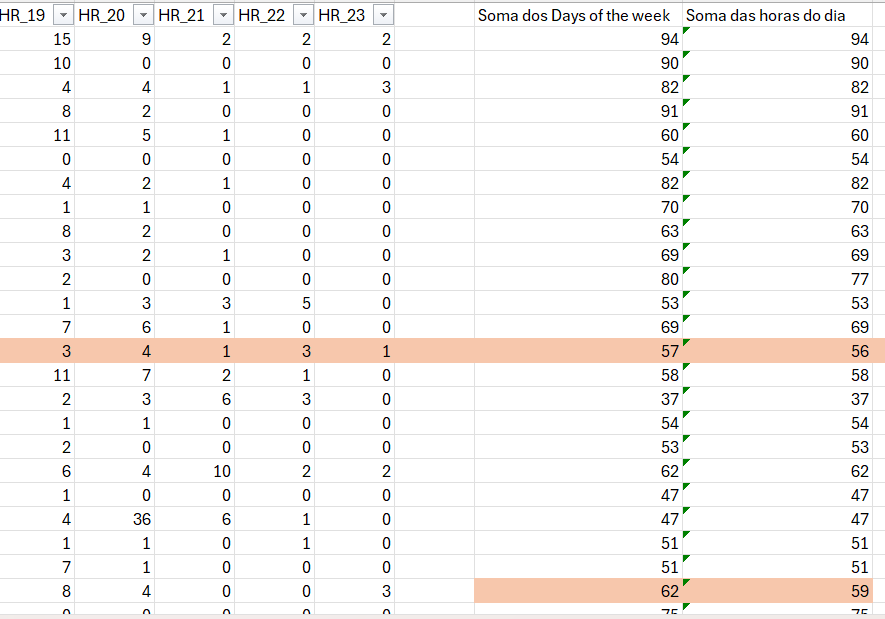

In [35]:
display(discrp)


And now we try to observe this using python

In [36]:
#Getting the total orders by the days of the week into a new column
food_df['Total orders'] = food_df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

In [37]:
#Getting the total orders by the hour of the day and assigning it to a column
food_df['Total orders_HR'] = food_df[[f'HR_{i}' for i in range(24)]].sum(axis=1).astype(int)


In [38]:
food_df.head() #Getting the first rows to check the if the new feautres are there

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,midday_orders,evening_orders,late_night_orders,Weekend,Weekday,Western_Cuisine,Asian_Cuisine,Desserts_Beverages,Total orders,Total orders_HR
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0.0,1,1,0.00,28.88,0.0,2,2
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0.0,1,1,12.82,6.39,0.0,2,2
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0.0,1,1,9.20,0.00,0.0,2,2
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0.0,1,1,0.00,31.56,0.0,2,2
4eb37a6705,4660,20.0,2,5,0,0.0,2,empty,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0.0,1,1,14.57,40.87,0.0,2,2


In [39]:
food_df['Total orders'].unique() # Getting the unique values of total_orders

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1,  0, 29, 51, 53, 65, 45, 91, 50, 75,
       49, 48, 80, 59], dtype=int64)

In [40]:
food_df['Total orders_HR'].unique() # Getting the unique values of total_orders_HR 

array([ 2,  3,  4,  5,  1,  7,  6, 12, 16, 23,  8, 21, 14, 11, 15, 10, 13,
       20, 26,  9, 17, 22, 54, 30, 18, 25, 42, 19, 32, 36, 28, 34, 24, 33,
       41, 39, 27, 47, 37, 58, 38, 63, 31, 69, 44, 35, 52, 56, 82, 90, 94,
       59, 43, 61, 70, 60, 55, 40,  0, 29, 51, 53, 65, 45, 91, 50, 75, 49,
       48, 77, 62])

This difference betweeen the total order and the total order by hour might give us an insight on the HR_O column, which has missing values(as observed in the mssing values section). Since this difference only occurs when there are nan in the HR_0 column, we will use this to fill in the missing values of the HR_0 Column

In [41]:
#Creting a discrepancy variable to check the difference between Total order and Total_orders_HR 
discrepancy = food_df['Total orders']- food_df['Total orders_HR']

In [42]:
discrepancy.unique() #Chekcing the unique values just for observation

array([ 0,  1,  2,  3,  5,  4, 12,  9,  8,  7,  6, 11, 15], dtype=int64)

We can now assure that there is a difference in the total orders by DOW and HR, thus, the values of the discrepancy, will be used to fill in the missing values in the `HR_0 column`.

In [43]:
#Getting an overral statistics of our dataset columns
num_food_df.describe().round() 


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,midday_orders,evening_orders,late_night_orders,Weekend,Weekday,Western_Cuisine,Asian_Cuisine,Desserts_Beverages
count,31148.0,31875.0,31875.0,31875.0,31769.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,30711.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0,31875.0
mean,28.0,3.0,6.0,3.0,28.0,64.0,5.0,10.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,9.0,18.0,4.0
std,7.0,3.0,7.0,4.0,24.0,23.0,12.0,24.0,8.0,6.0,4.0,8.0,5.0,6.0,7.0,11.0,10.0,5.0,10.0,16.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,1.0,3.0,3.0,17.0,30.0,12.0
min,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,23.0,1.0,2.0,1.0,7.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
50%,26.0,2.0,3.0,2.0,22.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,0.0
75%,31.0,4.0,7.0,3.0,45.0,83.0,6.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,3.0,3.0,12.0,23.0,1.0
max,80.0,41.0,269.0,83.0,90.0,90.0,280.0,897.0,229.0,326.0,220.0,740.0,230.0,256.0,309.0,468.0,706.0,275.0,366.0,454.0,136.0,16.0,17.0,15.0,17.0,16.0,20.0,20.0,0.0,14.0,12.0,11.0,14.0,7.0,8.0,15.0,52.0,23.0,25.0,36.0,26.0,14.0,13.0,23.0,22.0,20.0,24.0,35.0,36.0,11.0,15.0,13.0,71.0,61.0,29.0,45.0,60.0,468.0,1201.0,326.0


* CUI beverages is empty
* CUI Cafe is also empty

* `customer_age`: The standard deviation of 7 indicates that the ages are around the mean, with most ages likely within 21 to 35 (within one standard deviation of the mean). However, the maximum age of 80 shows there's a significant age outlier or a small group of much older customers.

* `CUI_`: as we can see, the Cuisines columns have outliers. For example, for the CUI_Asian, the mean is 10 and the std is 24 and the max value is 897.  Since all values below the 75th percentile are zero, this means that at least 75% of the data is clustered at zero. The remaining 25% includes all non-zero values, likely including the extreme outliers.

We can observe possible outliers in the other columns too. Thus, we will deepen this analysis through visualization tools. But let as try and check the percentage of outliers for each column

**Calculating the Percentage of outliers per each column**

Inter-Quartile Range formula:

<br>

$IQR = Q_3 – Q_1$

<br>

---

<br>

**Outliers** are the observations that fall
- below $Q_1 − 1.5 \times IQR$

or

- above $Q_3 + 1.5 \times IQR$

<br>
<br>

In [44]:
outlier_percentages = {}

# We know that low outliers are below Q 1 − 1.5 ⋅ IQR ‍ and high outliers are above Q 3 + 1.5 ⋅ IQR 
for column in food_df.columns:
    if pd.api.types.is_numeric_dtype(food_df[column]):
        #Defining Q1 and Q3 to then find IQR 
        Q1 = food_df[column].quantile(0.25)
        Q3 = food_df[column].quantile(0.75)
        IQR = Q3 - Q1
        #Getting the outliers below the first quantile and above the second quantile
        outliers = food_df[(food_df[column] < (Q1 - 1.5 * IQR)) | (food_df[column] > (Q3 + 1.5 * IQR))]
        #Getting the percentage of the outliers
        percentage_outliers = (len(outliers) / len(food_df)) * 100
        outlier_percentages[column] = percentage_outliers

#Printing the results and counting the number of columns per the percentage higher or lower than 5.
nr_col_lower_5=0
nr_col_higher_5=0
print("Percentage of outliers per column using IQR:")
for column, percentage in outlier_percentages.items():
    print(f"{column}: \033[1;35m{percentage:.2f}%\033[0m")
    if percentage <5:
        nr_col_lower_5+=1
    if percentage >5:
        nr_col_higher_5+=1

#Printing the number of columns who have a percentage lower than 5% and then higher than 5%. 
# We chose 5% becasue it was the percentage advised during classes
print(f"From the columns, \033[1;33m{nr_col_lower_5}\033[0m have a percentage lower than 5%")
print(f"From the columns, \033[1;33m{nr_col_higher_5}\033[0m have a percentage higher than 5%")

Percentage of outliers per column using IQR:
customer_age: 3.40%
vendor_count: 4.78%
product_count: 7.44%
is_chain: 9.89%
first_order: 0.00%
last_order: 0.00%
CUI_American: 11.00%
CUI_Asian: 10.89%
CUI_Beverages: 17.04%
CUI_Cafe: 4.29%
CUI_Chicken Dishes: 10.19%
CUI_Chinese: 11.05%
CUI_Desserts: 6.32%
CUI_Healthy: 6.80%
CUI_Indian: 10.82%
CUI_Italian: 20.23%
CUI_Japanese: 19.76%
CUI_Noodle Dishes: 6.98%
CUI_OTHER: 22.09%
CUI_Street Food / Snacks: 13.31%
CUI_Thai: 7.46%
DOW_0: 4.41%
DOW_1: 4.69%
DOW_2: 4.98%
DOW_3: 5.19%
DOW_4: 5.60%
DOW_5: 5.36%
DOW_6: 6.21%
HR_0: 0.00%
HR_1: 4.03%
HR_2: 4.67%
HR_3: 7.91%
HR_4: 7.43%
HR_5: 6.36%
HR_6: 5.49%
HR_7: 5.94%
HR_8: 9.26%
HR_9: 15.44%
HR_10: 20.70%
HR_11: 23.62%
HR_12: 20.38%
HR_13: 17.11%
HR_14: 16.01%
HR_15: 18.94%
HR_16: 22.41%
HR_17: 23.89%
HR_18: 20.99%
HR_19: 15.34%
HR_20: 9.63%
HR_21: 5.52%
HR_22: 3.71%
HR_23: 3.52%
midday_orders: 7.48%
evening_orders: 7.66%
late_night_orders: 6.74%
Weekend: 4.86%
Weekday: 7.23%
Western_Cuisine: 7.84%
A

As observed, there are plenty of columns with outliers, but before removing them, we have to firsstly analyse if it makes sense to remove them or not. For example, the `CUI columns` which have highest percentages of outliers, we should analise first what it means and how they affect our objective.  The quantile function skips missing values by default, however, they do reduce the number of data points, which could slightly affect the precision of the outlier threshold.

`Key Takeaways-Trends and anomalies`:
* We have found the values of the HR_0 column, whihc we initially thought as beeing empty beacsue no one buys at that time.

* We have observed that there a considerate ammount of ouliers in our dataset, and how they behave in each column

## 2.2.2 Categorical Variables

In [45]:
#Assigning the categorical features into a varibale called cat_food_df
cat_food_df=food_df.select_dtypes(include='object')

In [46]:
cat_food_df.describe() #Getting the statistics of the cateorical variables

,customer_region,last_promo,payment_method
count,31875,31875,31875
unique,9,4,3
top,8670,empty,CARD
freq,9761,16744,20153


**Through Academic knowledge, we know that there 4 types of customer segmentation:**
* Demographic Segmentation
* Geographic Segmentation
* Psychographic Segmentation
* Behavioral Segmentation

**Hence, for we will take a closer look into our Region feature which is a geographic feature**

In [47]:
food_df.customer_region.unique()

array(['2360', '8670', '4660', '2440', 'empty', '4140', '2490', '8370',
       '8550'], dtype=object)

There are 8 customer regions in our dataset.

In [48]:
#Getting the frequency of orders per each region
food_df.customer_region.value_counts()

8670     9761
4660     9550
2360     8829
2440     1483
4140      857
8370      495
2490      445
empty     442
8550       13
Name: customer_region, dtype: int64

Let us see that as a percentage

In [49]:
#Getting the perceante of entries for each custmer region
percentage_region=food_df.customer_region.value_counts(normalize=True) *100
percentage_region

8670     30.622745
4660     29.960784
2360     27.698824
2440      4.652549
4140      2.688627
8370      1.552941
2490      1.396078
empty     1.386667
8550      0.040784
Name: customer_region, dtype: float64

We can observe that the following regions have a percentage of entries higher than 10%

In [50]:
#Getting the regions with the entries higher than 10%
for region, percent in percentage_region[percentage_region > 10].items():
    print(f"Region \033[1;35m{region}\033[0m: {percent:.2f}%")

Region 8670: 30.62%
Region 4660: 29.96%
Region 2360: 27.70%


It would be interesting to know why these are the regions with the most entries, and why are the other 5 regions with such low percentage

To conclude, these insights about the regions might help us if we decide to do geographic segmentation. Let us analyse the column with other categorical variables.

In [51]:
# Creating a cross-tabulation to see the percentage of times each combination of customer region and last promo appears in the dataset
pd.crosstab(food_df['customer_region'], food_df['last_promo'], normalize=True) *100

last_promo,DELIVERY,DISCOUNT,FREEBIE,empty
customer_region,,,,
2360,5.832157,4.301176,3.758431,13.807059
2440,0.890980,0.765490,0.624314,2.371765
2490,0.313725,0.225882,0.175686,0.680784
4140,0.483137,0.345098,0.285490,1.574902
4660,4.934902,4.053333,3.457255,17.515294
8370,0.357647,0.178824,0.213333,0.803137
8550,0.012549,0.000000,0.015686,0.012549
8670,6.578824,4.015686,4.916078,15.112157
empty,0.304314,0.219608,0.210196,0.652549


Initially, we had replaced "-" by nan, but when we did the analysis here, we realized it would be important to not only see where we have data, but also where we don´t, as it might give as an insight on our customers.


As we can see from this crosstab, the regions with the highest entries, are also the `customer regions` with the highest "empty" entries in the `last_promo` column

In [52]:
# Creating a cross-tabulation to see the percentage of times each combination of last promo and payment method appears in the dataset
pd.crosstab(cat_food_df['last_promo'], cat_food_df['payment_method'], normalize=True) *100


payment_method,CARD,CASH,DIGI
last_promo,,,
DELIVERY,10.456471,4.778039,4.473725
DISCOUNT,8.417255,2.883137,2.804706
FREEBIE,8.498824,2.393725,2.763922
empty,35.852549,7.589020,9.088627


In [53]:
#Getting the percentage of each type of promotion
cat_food_df['last_promo'].value_counts(normalize=True)*100

empty       52.530196
DELIVERY    19.708235
DISCOUNT    14.105098
FREEBIE     13.656471
Name: last_promo, dtype: float64

As we can observe, the "empty" entries in the `last_promo` column have the highest entries in each type of `payment_method`, which can possibly mean that most of the orders are done when there is no promotion, assuming "empty" means no promotion.

In [54]:
# Creating a cross-tabulation to see the percentage of times each combination of customer region and payment method appears in the dataset
pd.crosstab(cat_food_df['customer_region'], cat_food_df['payment_method'], normalize=True) * 100

payment_method,CARD,CASH,DIGI
customer_region,,,
2360,17.016471,5.468235,5.214118
2440,2.836078,0.872157,0.944314
2490,0.900392,0.250980,0.244706
4140,1.791373,0.464314,0.432941
4660,20.213333,4.671373,5.076078
8370,0.912941,0.263529,0.376471
8550,0.025098,0.006275,0.009412
8670,18.682353,5.418039,6.522353
empty,0.847059,0.229020,0.310588


The CARD payment_methd seems to be the dominating one in every region, followed by DIGITAL and then CASH. This gives us an insight on our customers behaviours

`Key Takeaways-Customer Behaviour`:
* The highest payment method in all the regions is by CARD

* When people make orders with a promotion, the one with highest entries is the delivery promotion, but more than half of the orders are done with no promotions

* From the customer regions, 3 of the regions represent more than 50% of the customer region entries

## **2.3.Visual Exploration**

For this section, we wil perform a visual analhysis of our features, starting by the univariate analysis and then proceed to Bivariate analysis, to egt better insights of our dataset.

## 2.3.1 Numerical Variables

## Univariate Analysis

Falta adicionar as interpretações, to aborrecida

`customer_age`

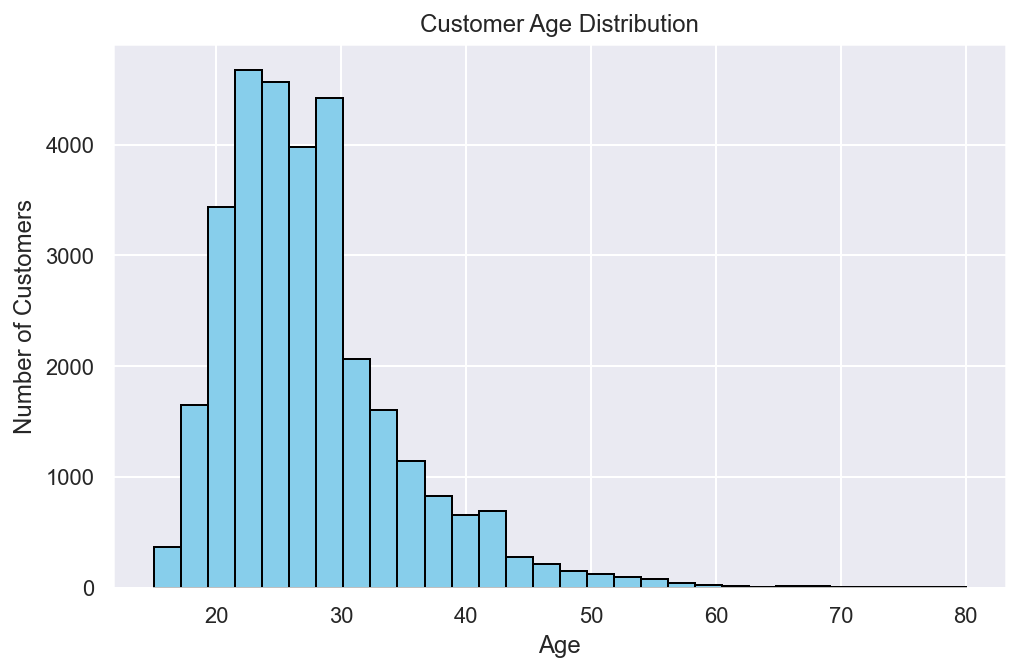

In [55]:
#Visualizing  the distribution of customer age in our dataset, using an histogram
plt.figure(figsize=(8, 5))
plt.hist(food_df['customer_age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

#intrepertar com: normal distribution, range, concentração, e skewness, outliers

Let us plot this column in a boxplot to better see the outliers 

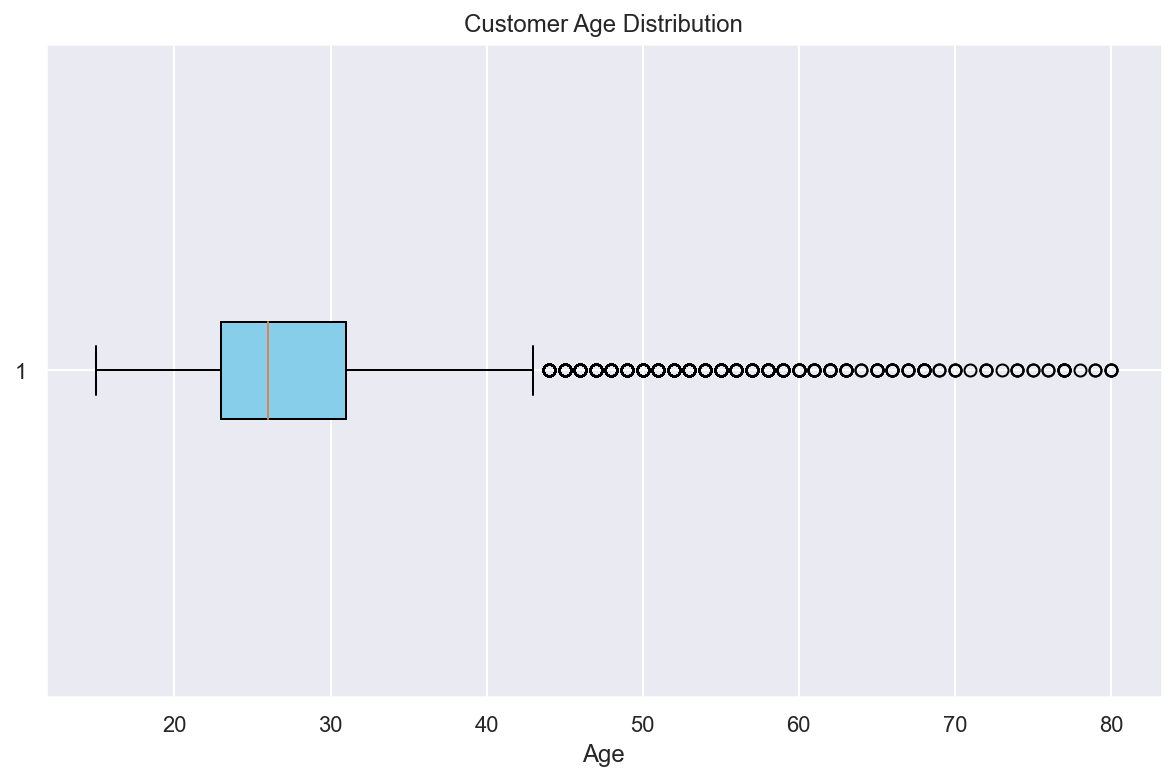

In [56]:
# Visualizing the distribution of customer age with a boxplot to better visualize the outliers
plt.figure(figsize=(10, 6))
plt.boxplot(food_df['customer_age'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.show()

`Total Orders`

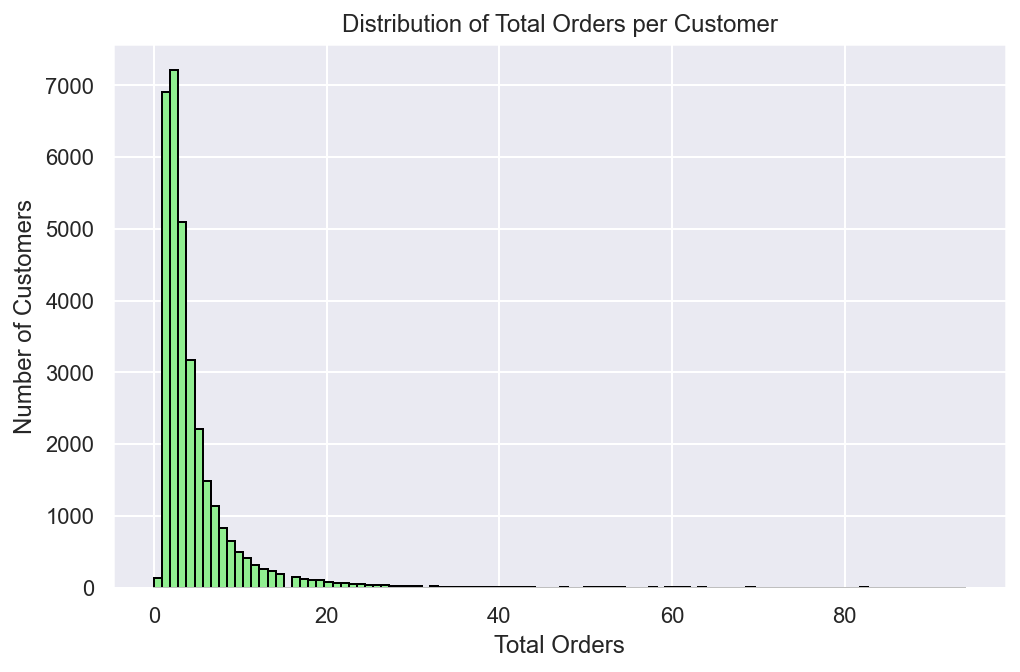

In [57]:
# Visualizing the Total orders per customer in an histogram
plt.figure(figsize=(8, 5))
plt.hist(food_df['Total orders'], bins=100, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Orders per Customer')
plt.xlabel('Total Orders')
plt.ylabel('Number of Customers')
plt.show()


Highly skewed distribution

`Vendor Count`

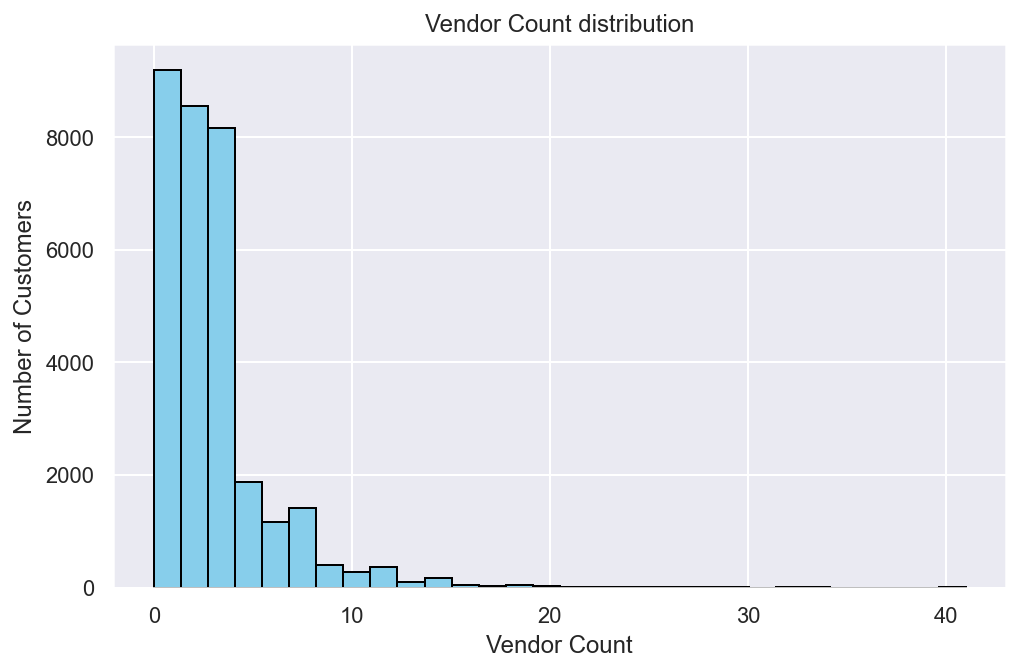

In [58]:
#Visualizing  the distribution of Vendor count in our dataset, using an histogram
plt.figure(figsize=(8, 5))
plt.hist(food_df['vendor_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Vendor Count distribution')
plt.xlabel('Vendor Count')
plt.ylabel('Number of Customers')
plt.show()


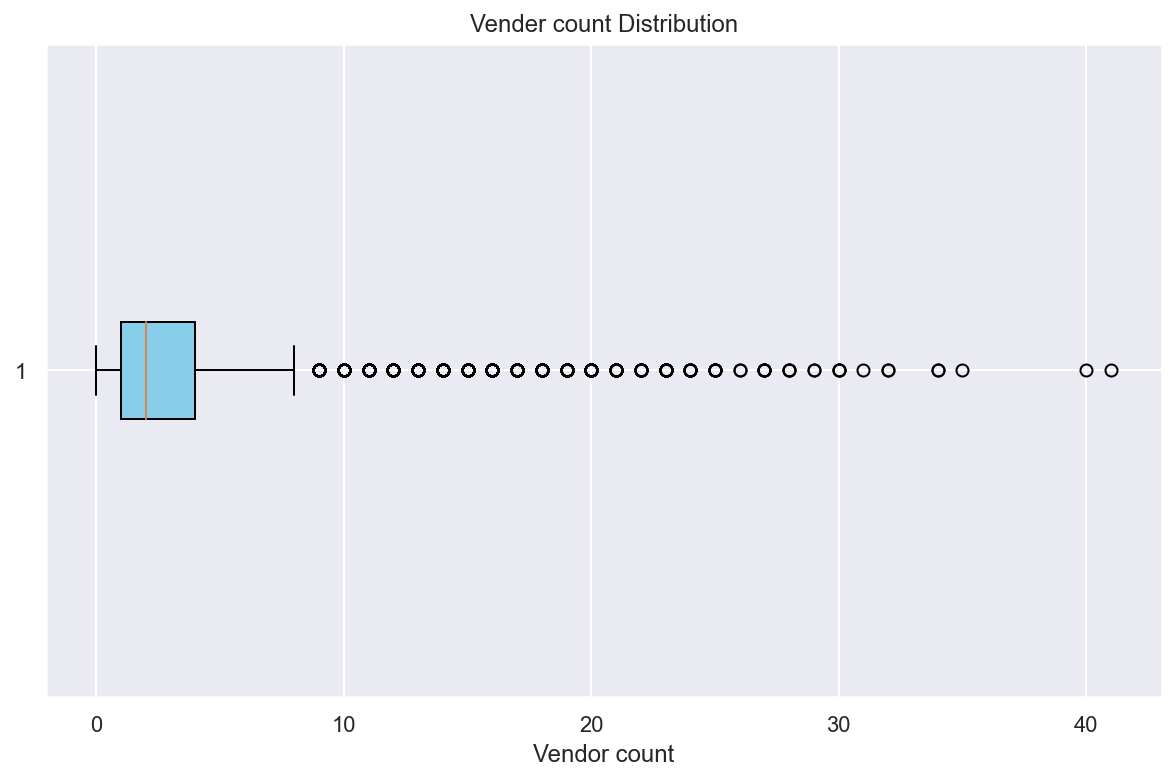

In [59]:
# Visualizing the distribution of Vendor Count with a boxplot to better visualize the outliers
plt.figure(figsize=(10, 6))
plt.boxplot(food_df['vendor_count'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title('Vender count Distribution')
plt.xlabel('Vendor count')
plt.show()

`Is_Chain`

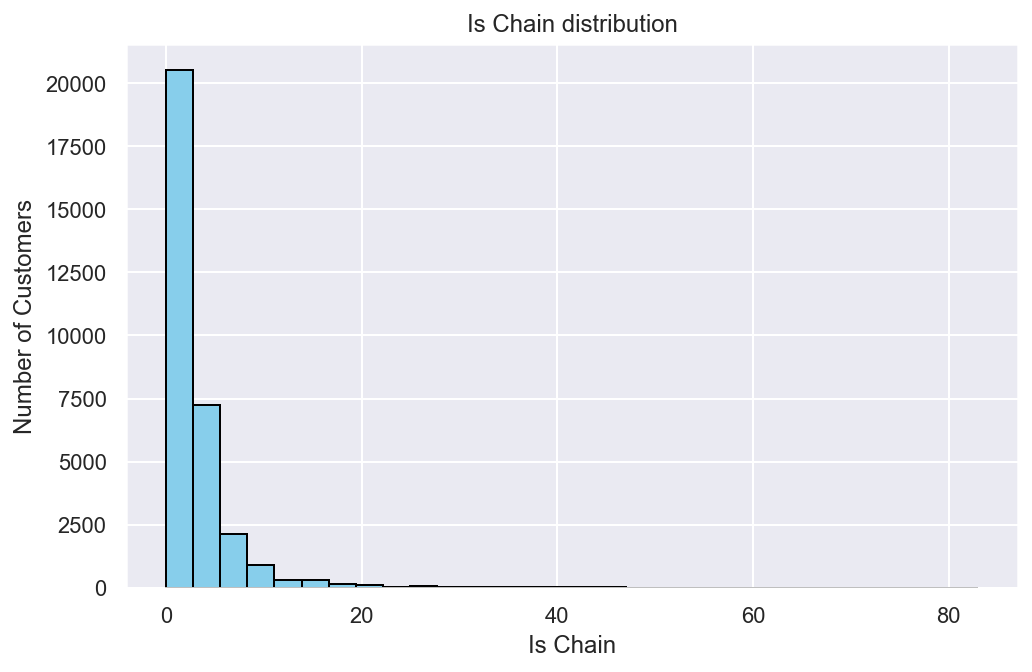

In [60]:
#Visualizing  the distribution of is_chain in our dataset, using an histogram
plt.figure(figsize=(8, 5))
plt.hist(food_df['is_chain'], bins=30, color='skyblue', edgecolor='black')
plt.title('Is Chain distribution')
plt.xlabel('Is Chain')
plt.ylabel('Number of Customers')
plt.show()

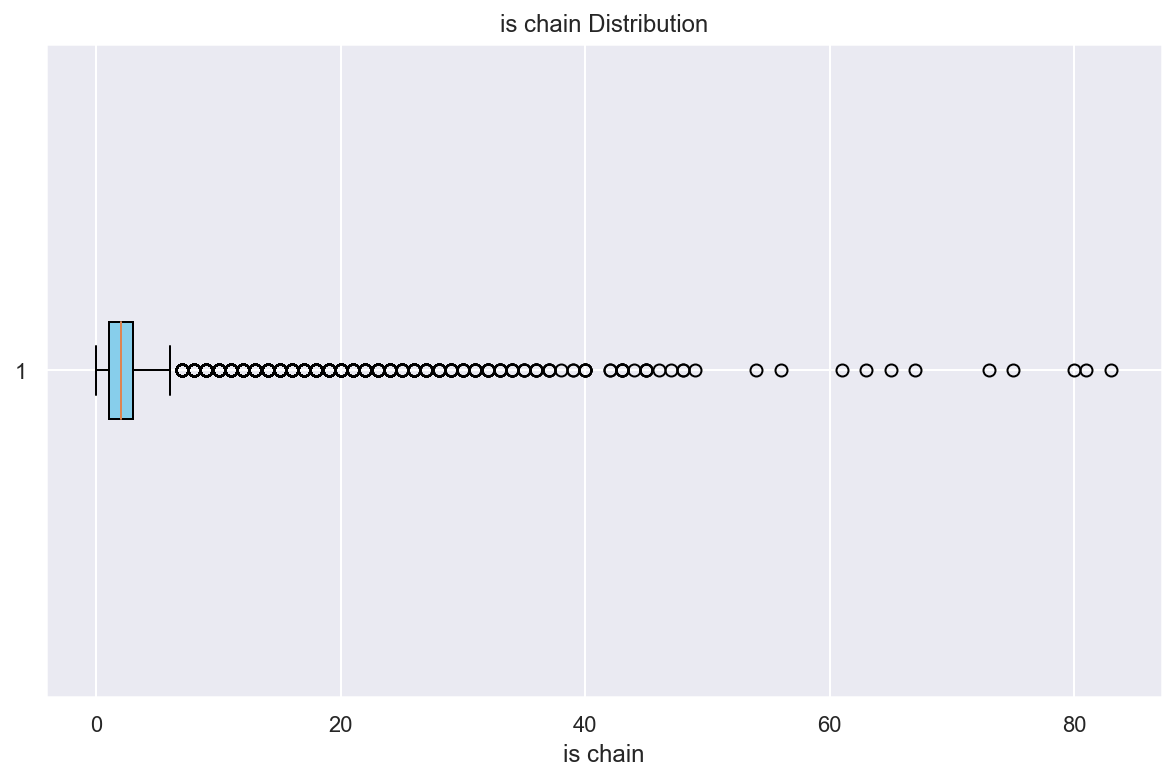

In [61]:
# Visualizing the distribution of Vendor Count with a boxplot to better visualize the outliers
plt.figure(figsize=(10, 6))
plt.boxplot(food_df['is_chain'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title('is chain Distribution')
plt.xlabel('is chain')
plt.show()

`Key Takeaways`- Univariate Analysis:
* Features with very skewed distribution

## Bivariate Analysis

In [62]:
food_df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'midday_orders',
       'evening_orders', 'late_night_orders', 'Weekend', 'Weekday',
       'Western_Cuisine', 'Asian_Cuisine', 'Desserts_Beverages',
       'Total orders', 'Total orders_HR'],
      dtype='object')

`Total orders by hour of the day`

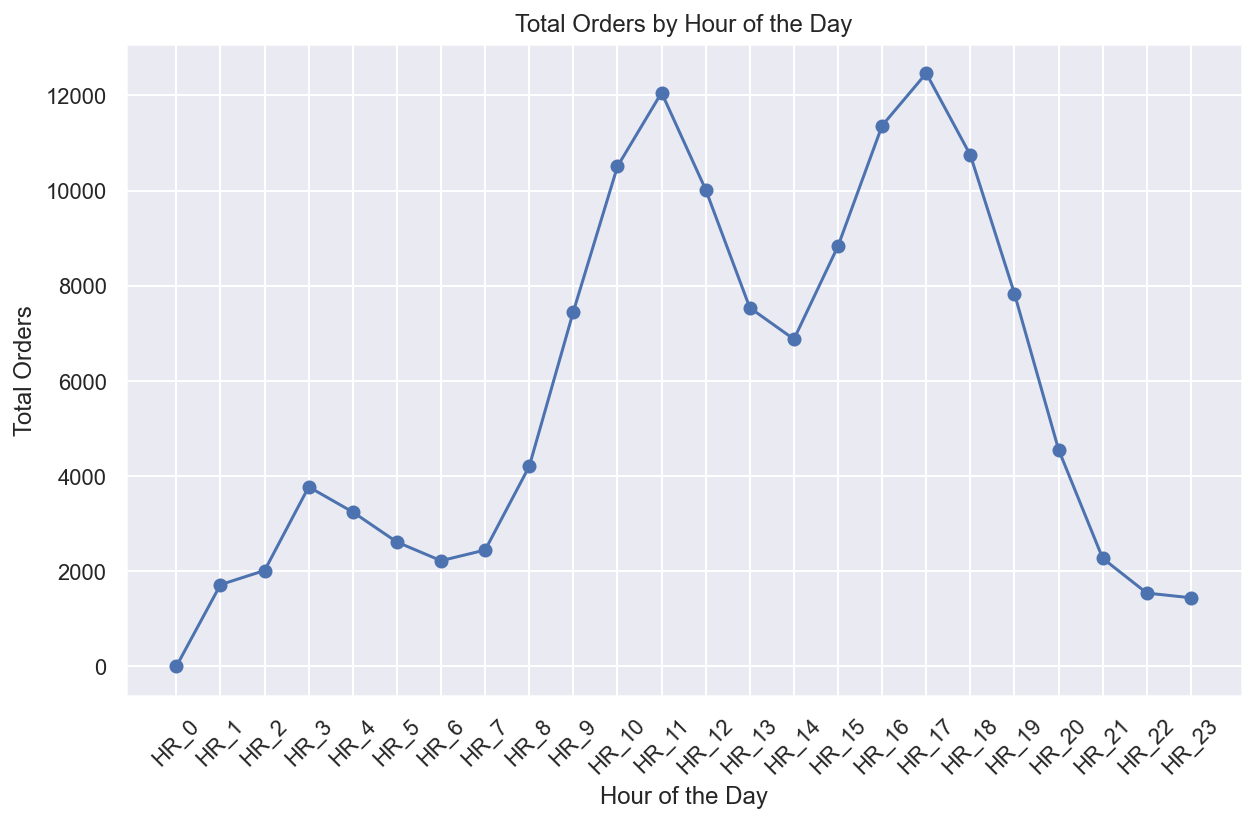

In [63]:
hours_of_the_day = [f'HR_{i}' for i in range(24)]
plt.figure(figsize=(10, 6))
plt.plot(hours_of_the_day, food_df[hours_of_the_day].sum(), marker='o', color='b')
plt.title('Total Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

`Time of the day`

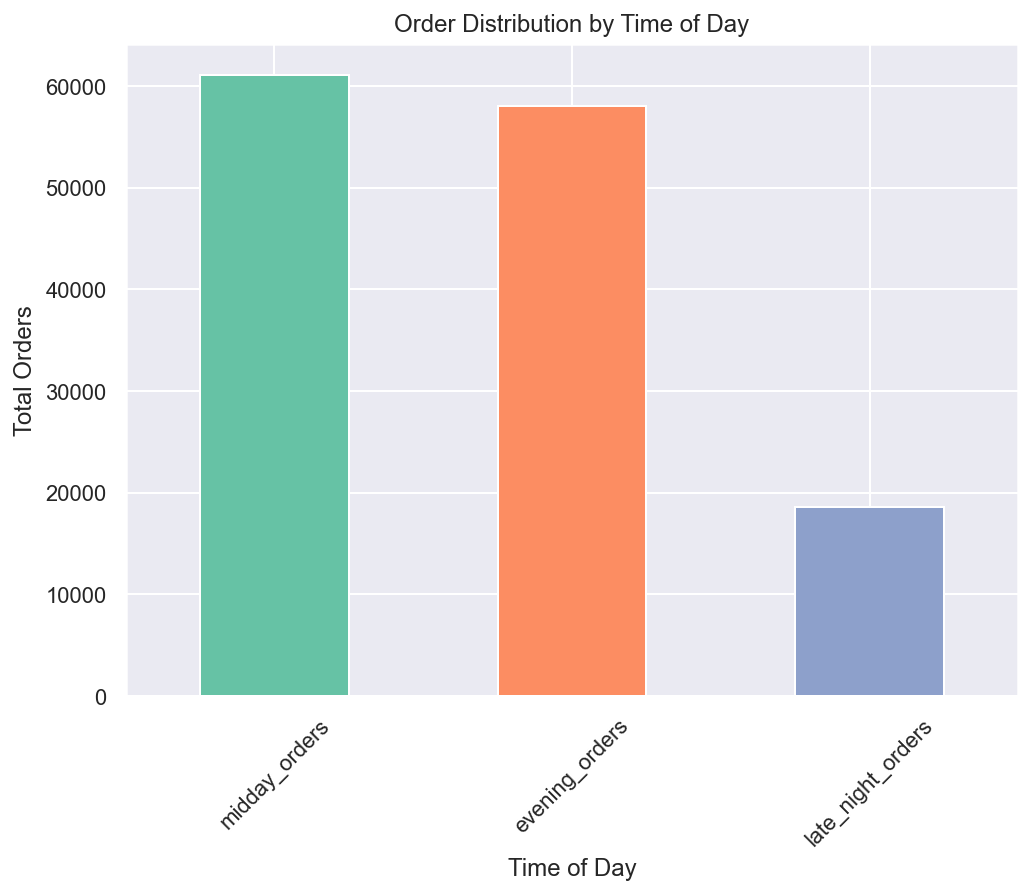

In [64]:
# Creating 
time_of_day_columns = ['midday_orders', 'evening_orders', 'late_night_orders']

plt.figure(figsize=(8, 6))
food_df[time_of_day_columns].sum().plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Order Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

`Cuisines`

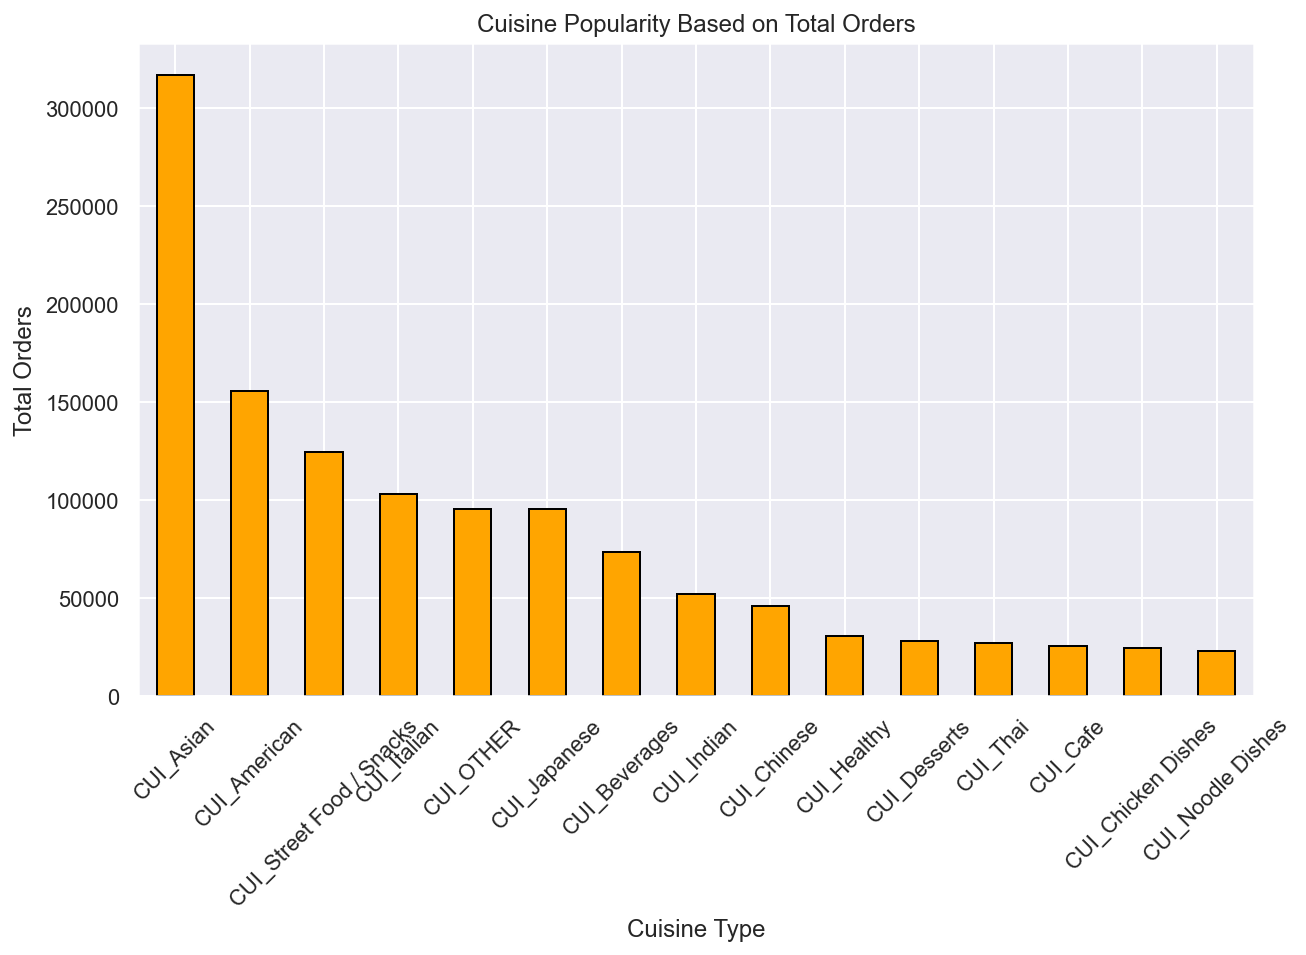

In [65]:
cuisine_columns = [col for col in food_df.columns if col.startswith('CUI_')]
cuisine_totals = food_df[cuisine_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cuisine_totals.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Cuisine Popularity Based on Total Orders')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

`Vendor count and Product count`

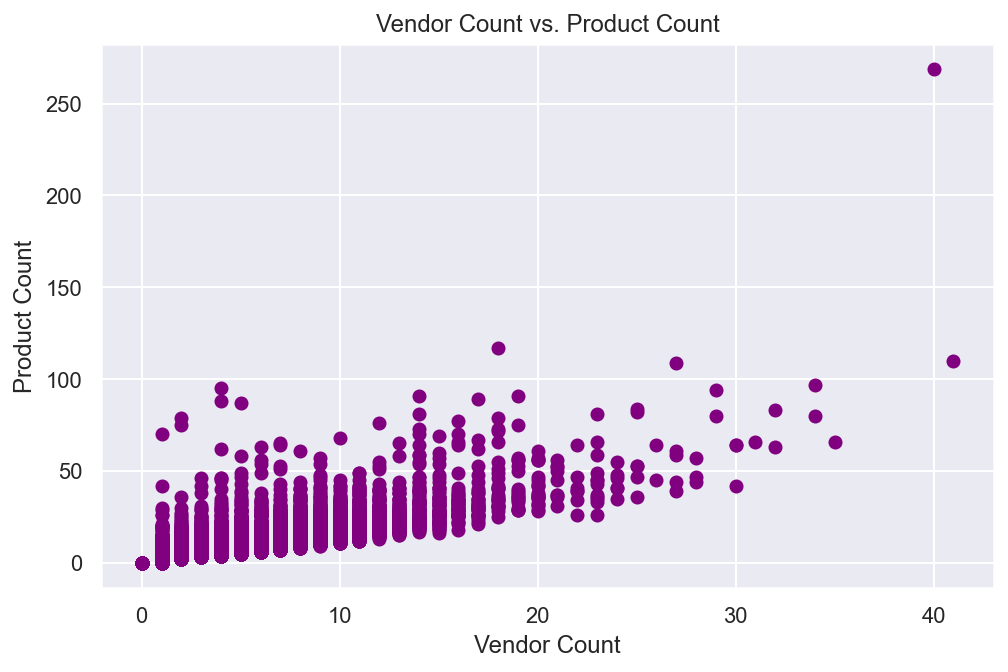

In [66]:
plt.figure(figsize=(8, 5))
plt.scatter(food_df['vendor_count'], food_df['product_count'], color='purple')
plt.title('Vendor Count vs. Product Count')
plt.xlabel('Vendor Count')
plt.ylabel('Product Count')
plt.grid(True)
plt.show()

`First order and Last order`

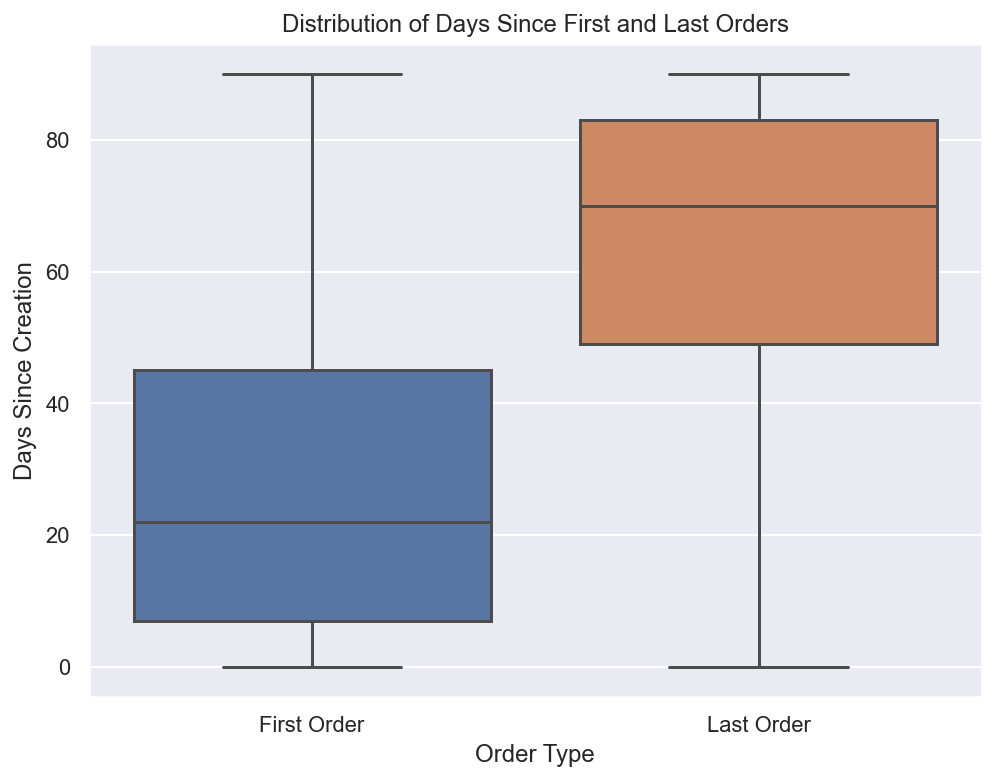

In [67]:
plt.figure(figsize=(8, 6))

# Create a DataFrame for boxplot
order_data = pd.DataFrame({
    'First Order': food_df['first_order'],
    'Last Order': food_df['last_order']
})

# Melt the DataFrame for seaborn
order_data_melted = order_data.melt(var_name='Order Type', value_name='Days Since Creation')

# Plot the boxplot
sns.boxplot(x='Order Type', y='Days Since Creation', data=order_data_melted)
plt.title('Distribution of Days Since First and Last Orders')
plt.xlabel('Order Type')
plt.ylabel('Days Since Creation')
plt.show()

#TODO procurar uma solução  melhor

`Correlation Matrix between orders, vendor_count, product_count, is_chain, first and last order`

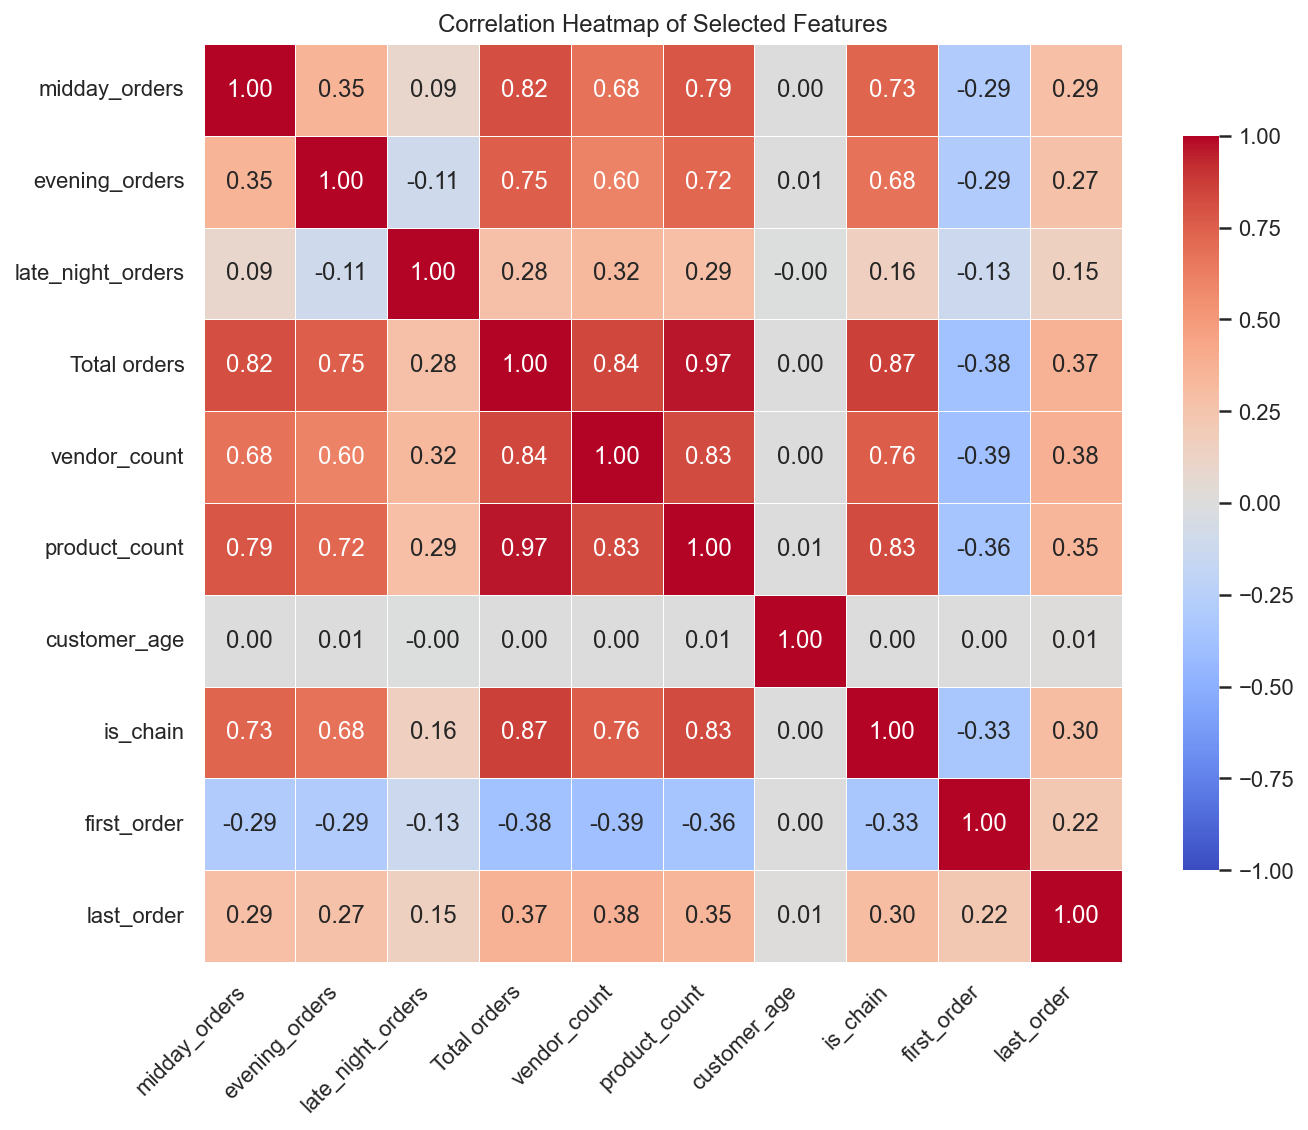

In [68]:
selected_features = [
    'midday_orders', 'evening_orders', 'late_night_orders',
    'Total orders', 'vendor_count', 'product_count', 
    'customer_age', 'is_chain','first_order', 'last_order'
]

# Step 2: Calculate the correlation matrix for the selected features
correlation_matrix = food_df[selected_features].corr()

# Step 3: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation coefficients
            fmt='.2f',   # Format for the annotation
            cmap='coolwarm',  # Color map
            square=True,  # Make cells square
            cbar_kws={"shrink": .8},  # Color bar size
            linewidths=0.5,  # Lines between cells
            vmin=-1,  # Minimum limit for color bar
            vmax=1)  # Maximum limit for color bar

# Set titles and labels
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

`Key Takeaways`-Bivariate Analysis:
* Something

## 2.3.2 Categorical Variables

## Univariate analysis

`Customer Region`

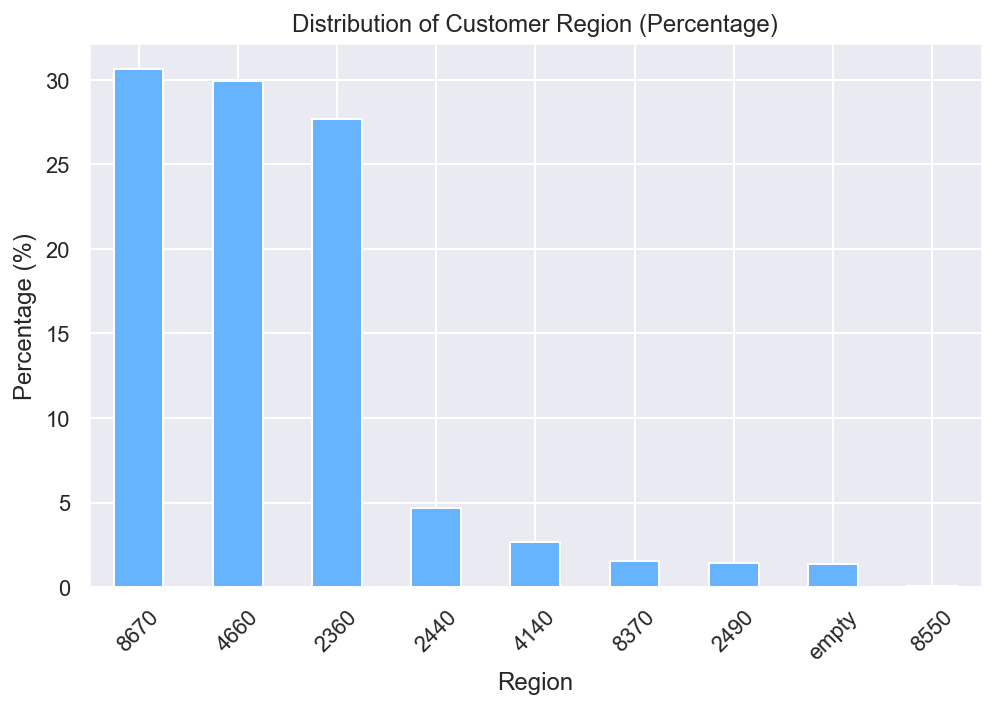

In [69]:
#TODO mudar o grafico
plt.figure(figsize=(8, 5))

# Calculate percentage for each payment method
payment_method_percentage = cat_food_df['customer_region'].value_counts(normalize=True) * 100

# Plot the percentages
payment_method_percentage.plot(kind='bar', color=['#66b3ff'])

# Add title and labels
plt.title('Distribution of Customer Region (Percentage)')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

`Payment Methods`

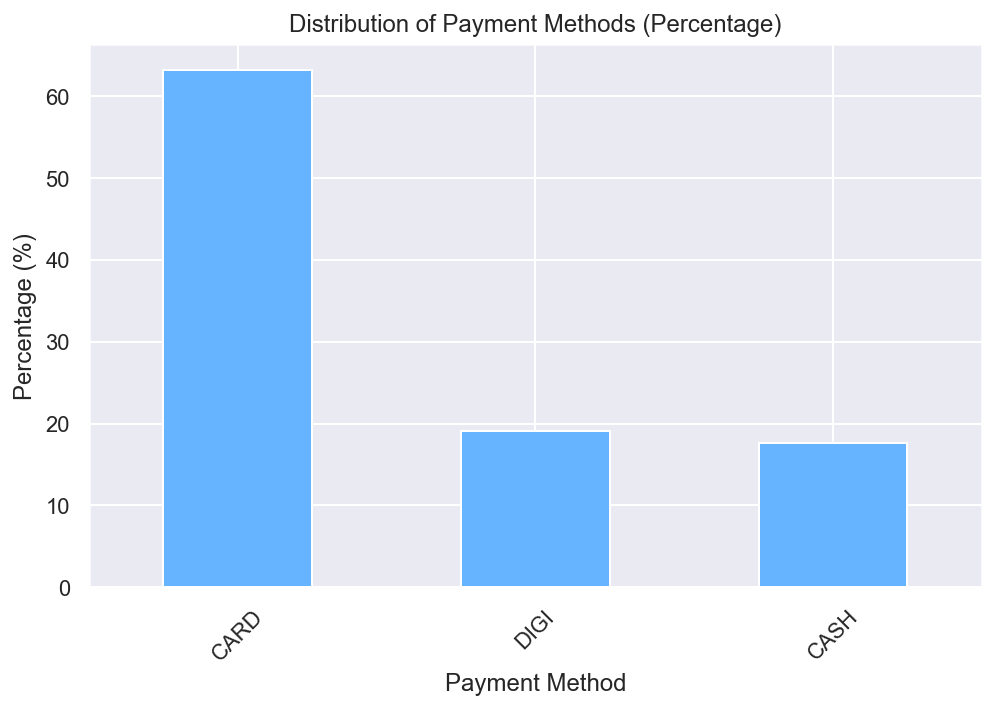

In [70]:
#TODO mudar o grafico
plt.figure(figsize=(8, 5))

# Calculate percentage for each payment method
payment_method_percentage = food_df['payment_method'].value_counts(normalize=True) * 100

# Plot the percentages
payment_method_percentage.plot(kind='bar', color=['#66b3ff'])

# Add title and labels
plt.title('Distribution of Payment Methods (Percentage)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


`Last Promotion`

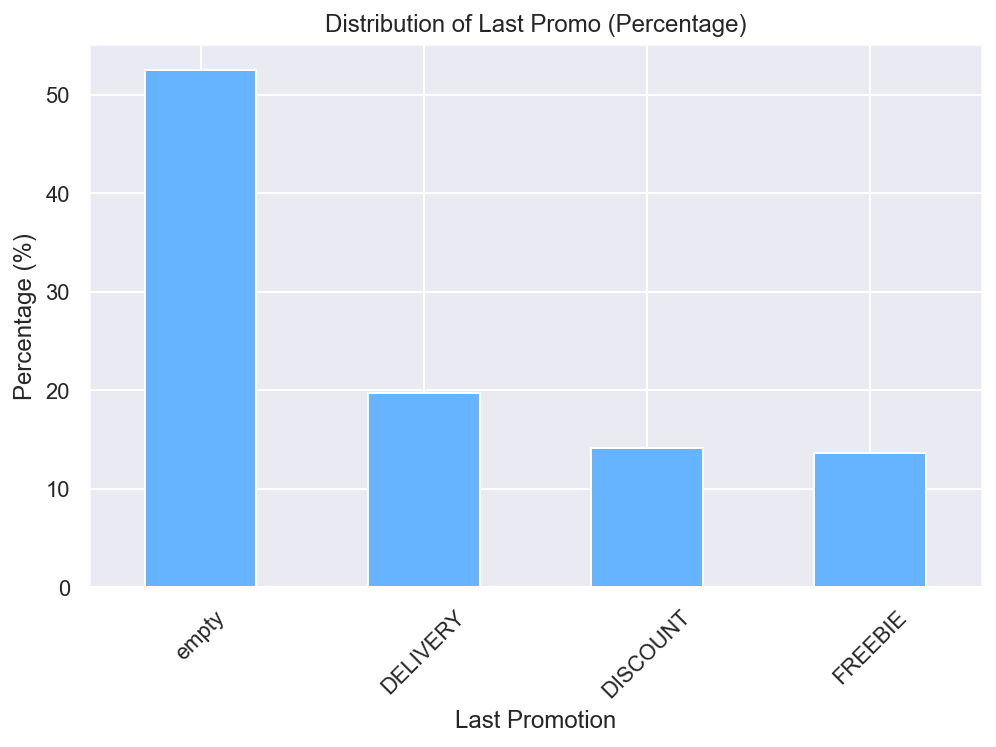

In [71]:
#TODO mudar o grafico
plt.figure(figsize=(8, 5))

# Calculate percentage for each payment method
payment_method_percentage = cat_food_df['last_promo'].value_counts(normalize=True) * 100

# Plot the percentages
payment_method_percentage.plot(kind='bar', color=['#66b3ff'])

# Add title and labels
plt.title('Distribution of Last Promo (Percentage)')
plt.xlabel('Last Promotion')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

`Key Takeaways`-Univariate Analysis:
* Something

## Bivariate analysis

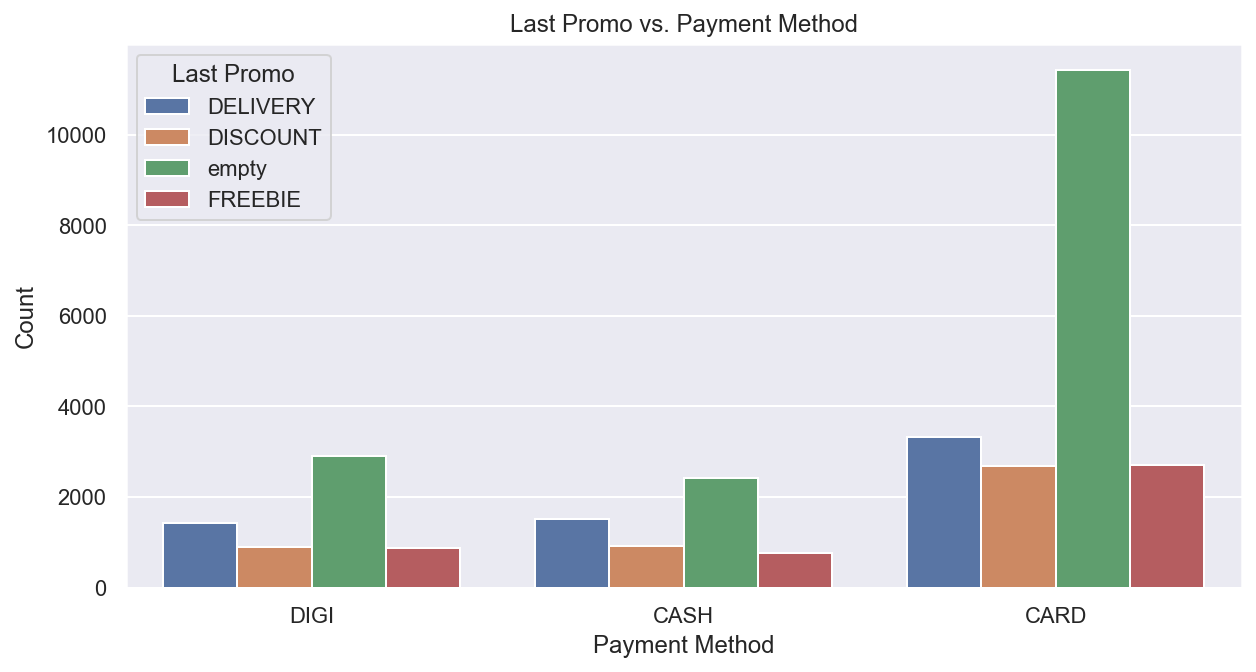

In [72]:
# Last Promo vs. Payment Method
plt.figure(figsize=(10, 5))
sns.countplot(data=food_df, x='payment_method', hue='last_promo')
plt.title('Last Promo vs. Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Last Promo')
plt.show()

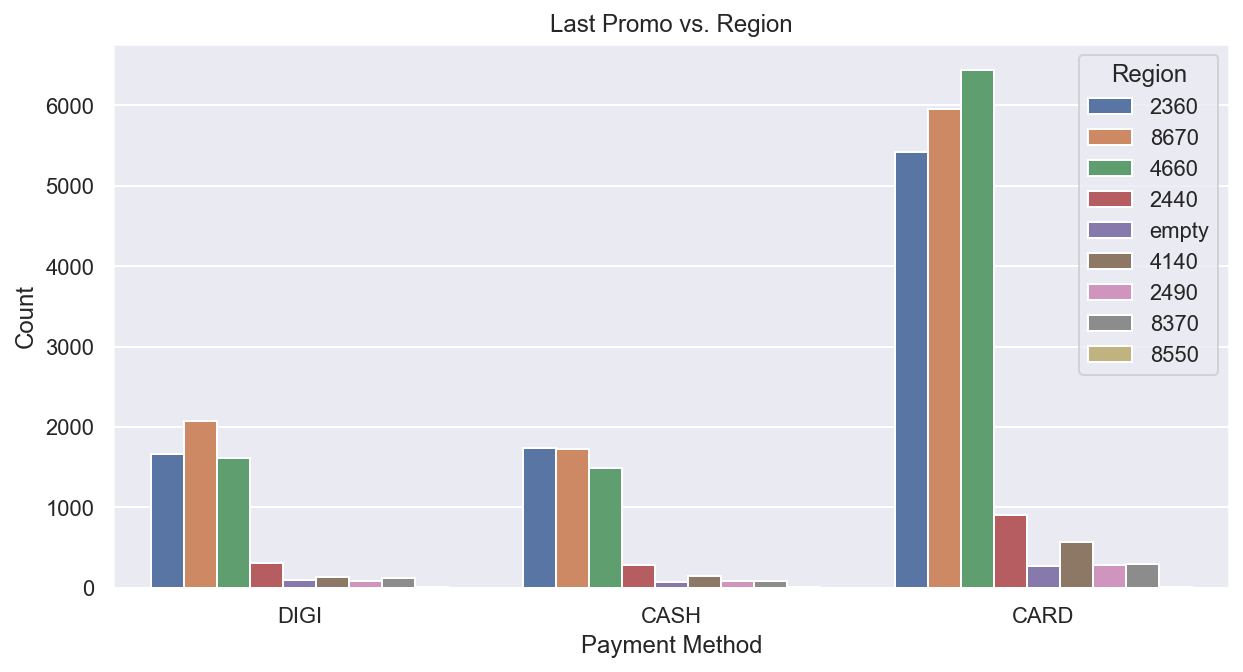

In [73]:
plt.figure(figsize=(10, 5))
sns.countplot(data=food_df, x='payment_method', hue='customer_region')
plt.title('Last Promo vs. Region')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Region')
plt.show()

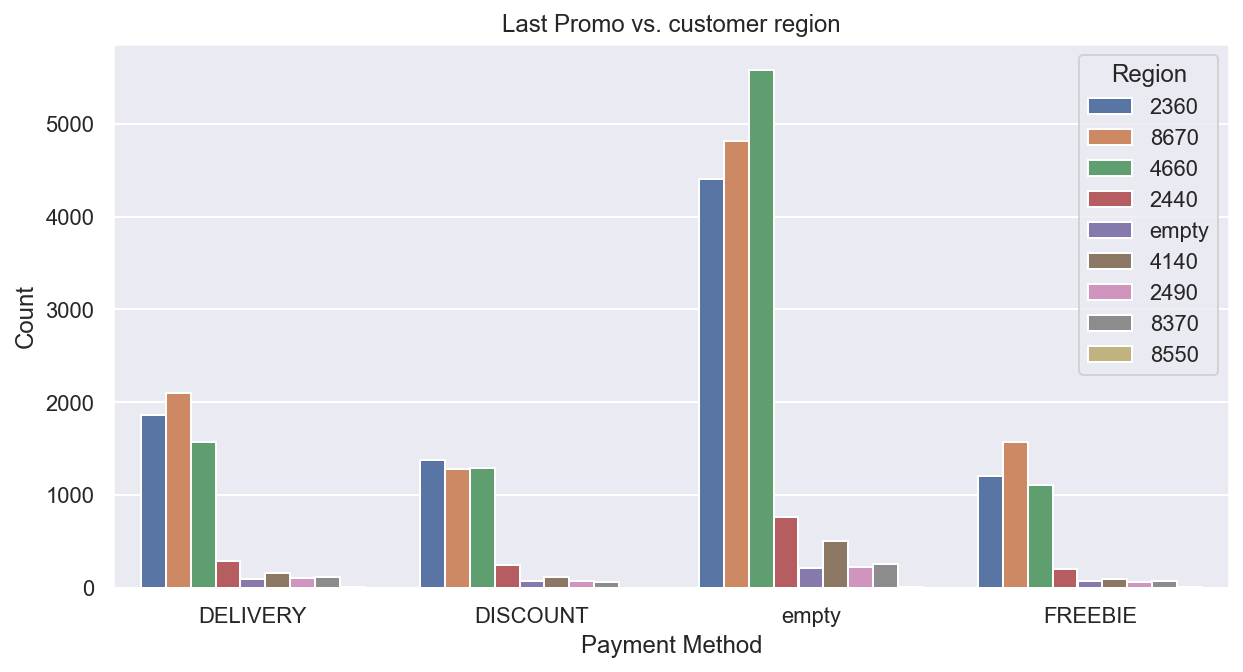

In [74]:
plt.figure(figsize=(10, 5))
sns.countplot(data=food_df, x='last_promo', hue='customer_region')
plt.title('Last Promo vs. customer region')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Region')
plt.show()

`Key Takeaways`-Bivariate Analysis:
* Something

# 3. DATA PRE-PROCESSING

# 3.1 Missing Values

In [75]:
#food_df['HR_0'] = food_df['HR_0'].fillna(food_df['Total orders'] - food_df['Total orders_HR'])

In [76]:
# trocar os NaN por No Promotion
#food_df['last_promo'] = food_df['last_promo'].fillna('NOPROMO')

## 3.2 Feature Engineering

In [77]:
# List of columns to drop
columns_to_drop = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 
                   'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 
                   'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 
                   'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 
                   'HR_22', 'HR_23', 'Total orders_HR', 
                   'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                   'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                   'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
                   'CUI_Thai']

# Drop the columns from the DataFrame
food_df = food_df.drop(columns=columns_to_drop)

In [78]:
# Define the new order of columns
new_column_order = ['customer_region', 'customer_age', 
                    'vendor_count', 'product_count', 'is_chain', 
                    'first_order', 'last_order', 'last_promo', 
                    'midday_orders', 'evening_orders', 'late_night_orders', 
                    'payment_method', 
                    'Western_Cuisine', 'Asian_Cuisine', 'Desserts_Beverages', 
                    'CUI_Healthy', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
                    'Total orders', 'Weekday', 'Weekend']

# Reorder the columns
food_df = food_df[new_column_order]